<a href="https://colab.research.google.com/github/GLmounika/FMML-MODULE2-LAB1/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

#Answer for first question

Increasing the percentage of the validation set will generally decrease the accuracy of the validation set. This is because the model will have less data to train on, and is therefore more likely to overfit to the training data. Overfitting means that the model learns to make predictions that are specific to the training data, and may not generalize well to new data.

**Reducing the percentage  of the validation set**will generally increase the accuracy of the validation  set.However,if the validation set is too small,it may not be representative of the overall dataset.This can lead to the model overfitting set, and not performing well on new data.

In general,it is important to choose a validation set percentage that is large enough to be representative of the overall dataset,but small enough to avoid overfitting.A good staring point is to use a validation set 20% of the data.However,the optimal validation set percentage will vary depending on the specific dataset and machine learning model being used.

Here are some additional things to keep in mind when choosing a validation set percentage:

*If the dataset is small,it is important to use a smaller validation set percentage to aviod overfitting.

*If the database is noisy,it is important to use a large validation set percentage to get a more accurate estimates of the model's performance

#Answer For Second Question

Reduced Training Data: With more data allocated to validation, you have less data available for training. This can result in a model that doesn't learn as effectively, potentially leading to underfitting. Slower Training: Training may take longer as the model has fewer samples for learning. Finding the Right Balance: The optimal size for a validation set depends on the dataset, the complexity of the model, and the amount of data available. Cross-validation techniques can help mitigate the negative impact of a smaller training set while providing robust validation. Reducing the Percentage of Validation Set:

Positive Impact on Model Performance: Reducing the percentage of data allocated to the validation set means you have more data available for training. This can lead to the following outcomes: Larger Validation Set:

A larger validation set can provide a more accurate estimate of how well the model generalizes to unseen data. With a larger validation set, the model's performance on this set is likely to be a better indicator of its performance on the test set. However, if you allocate too much data to the validation set, you may reduce the amount of data available for training, potentially leading to underfitting. The model may not learn the underlying patterns effectively.


#3.Answer For Third Question

Rule of Thumb: A common practice is to split your data into three sets: training, validation, and test. Common split ratios are 70-15-15, 80-10-10, or 60-20-20, where the first number represents the percentage allocated to training, the second to validation, and the third to testing. These ratios ensure a reasonable balance between training and validation, while still reserving a separate test set for final evaluation.

Size of Dataset: If you have a small dataset, you might lean towards a larger validation set because you have limited data for training. For very large datasets, a smaller validation set may be sufficient.

Complexity of Model: If you're working with a complex model (e.g., deep neural networks), you may need a larger validation set to detect overfitting. Simpler models may require a smaller validation set.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [13]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [14]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


#ANSWER FOR QUESTION 1

Yes,averaging the validation accuracy across multiple splits give more consistent results.This is because cross -validation helps to reduce the variance in the model's performance due to random sampling.


#ANSWER FOR QUESTION 2

It's useful for building more accurate machine learning models and evaluating how will they work on an independent test dataset. Cross validation is easy to understand and implement making it go to method for comparing the predictive capabilities of different models and choosing best.

#ANSWER FOR QUESTION 3

Yes we can deal with a very small train dataset or validation dataset by increasing the iterations.

#ANSWER FOR QUESTION 4

Yes we can deal with a very small train dataset or validation dataset by increasing the iterations.

**Now let us see how augmentation affects accuracy.we will pick components from what we studied in the module**

we will experiment with MNIST dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])

11490434/11490434 [==============================] - 1s 0us/step
(28, 28) 5


In [16]:
train_X = train_X/255
test_X = test_X/255

In [17]:
train_X = train_X[::1200,:,:].copy()
train_y = train_y[::1200].copy()


In [20]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample))
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint
  print("angle with constraint is:", angle)
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample)


def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

def NN(traindata, trainlabel, testdata):

  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

In [22]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount)
  img = warp(sample, tform)
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample)


In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [23]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

In [26]:

angleconstraint = 60
naugmentations = 5


augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint)))
  auglabel = np.concatenate((auglabel, train_y))

testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))


shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.0338778  0.68301496 0.95049627 0.82915049 0.27719814 0.05332508
 0.94035141 0.93706272 0.53241532 0.64231741 0.46260006 0.41976537
 0.11944844 0.0967529  0.23273215 0.83664075 0.1458323  0.22669865
 0.54861406 0.21513122 0.16320668 0.56331624 0.36809327 0.62615929
 0.91220534 0.15099313 0.91343366 0.90248997 0.82908758 0.63128592
 0.62014666 0.63921266 0.69049555 0.0164822  0.95809258 0.58560376
 0.78146584 0.37728184 0.01239721 0.50973466 0.50719012 0.43698929
 0.33971705 0.24982609 0.52754487 0.37527814 0.96993188 0.17292731
 0.31966557 0.29396047]
angle with constraint is: [-27.96733229  10.98089739  27.02977619  19.74902942 -13.36811159
 -26.8004949   26.42108475  26.22376349   1.94491918   8.5390447
  -2.24399636  -4.81407797 -22.83309384 -24.1948261  -16.0360712
  20.19844478 -21.25006196 -16.39808089   2.91684356 -17.09212692
 -20.20759892   3.7989745   -7.91440374   7.56955715  24.73232042
 -20.94041211  2

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [25]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90]
accuracies = np.zeros(len(angleconstraints), dtype=np.float)

for ii in range(len(angleconstraints)):

  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))


  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)


<ipython-input-25-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.65193103 0.86749063 0.45389688 0.24783956 0.23666236 0.74601428
 0.81656876 0.10527808 0.06655886 0.59443366 0.14617324 0.82466419
 0.31033467 0.14387193 0.92097047 0.16553172 0.28472008 0.1536134
 0.11549006 0.02114802 0.05539541 0.17464147 0.05338193 0.59114382
 0.68071453 0.39363046 0.3179911  0.50452624 0.87500494 0.85113163
 0.04347506 0.18149841 0.23674487 0.24938758 0.57123265 0.41626243
 0.04925412 0.37361414 0.52375295 0.1016719  0.83345855 0.05196187
 0.92484187 0.09911314 0.84357495 0.90265314 0.97957068 0.80202588
 0.77947754 0.64248328]
angle with constraint is: [ 1.51931026  3.67490632 -0.46103118 -2.52160437 -2.63337637  2.4601428
  3.16568763 -3.9472192  -4.33441143  0.94433664 -3.53826756  3.2466419
 -1.89665326 -3.56128067  4.20970472 -3.34468277 -2.15279918 -3.46386605
 -3.84509936 -4.78851984 -4.44604591 -3.25358529 -4.46618067 

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

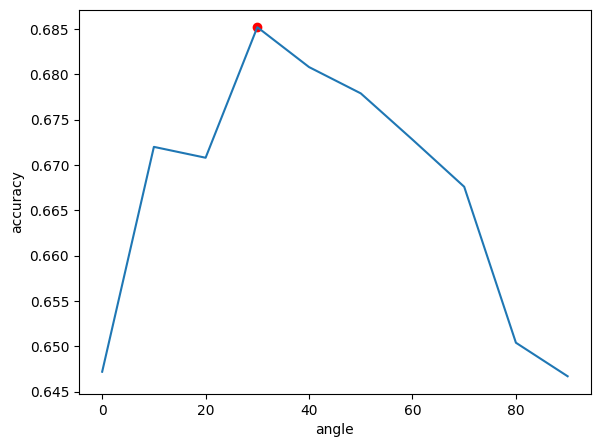

In [27]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')


Let us do a grid search to find the best shear constraint.

In [28]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
accuracies = np.zeros(len(shearconstraints), dtype=np.float)

for ii in range(len(shearconstraints)):

  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)


<ipython-input-28-8a89fef4983d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6191
Accuracy after shear augmentation constrained by  0.4  is  0.6395
Accuracy after shear augmentation constrained by  0.6  is  0.6548
Accuracy after shear augmentation constrained by  0.8  is  0.6481
Accuracy after shear augmentation constrained by  1.0  is  0.6385
Accuracy after shear augmentation constrained by  1.2  is  0.6381
Accuracy after shear augmentation constrained by  1.4  is  0.614
Accuracy after shear augmentation constrained by  1.6  is  0.6202
Accuracy after shear augmentation constrained by  1.8  is  0.6273
Accuracy after shear augmentation constrained by  2.0  is  0.5944


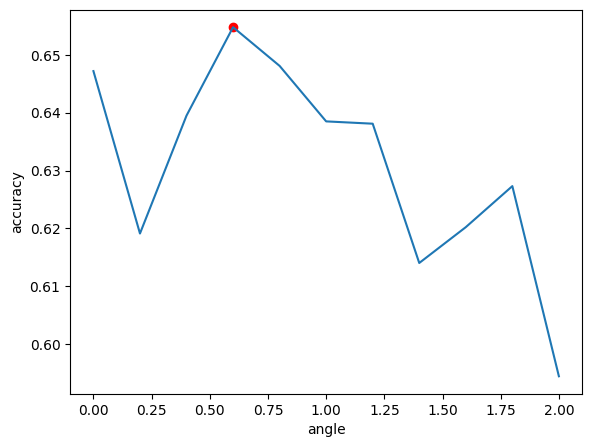

In [29]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [30]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconstraint
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii])
  return np.squeeze(nsample)


Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters.

In [32]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
angleconstraints = [0,10,20,30,40,50,60]
hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=np.float)

for ii in range(len(hyp)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1])))
    auglabel = np.concatenate((auglabel, train_y))
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)



<ipython-input-32-43599f5a167e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float)


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6074
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.6175
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.5998
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.6031
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.5987
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.6136
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6333
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.5902
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5941
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.5976
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.5961
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6115
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.6004
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6343
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

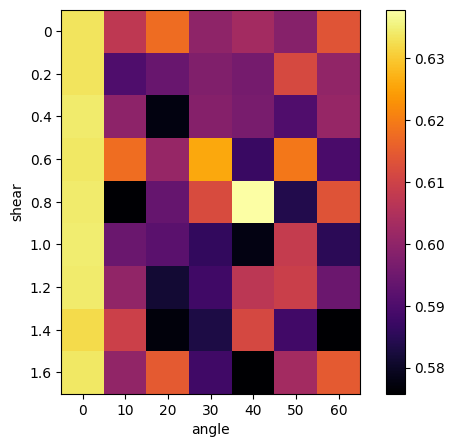

In [33]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(550, 978, 3)


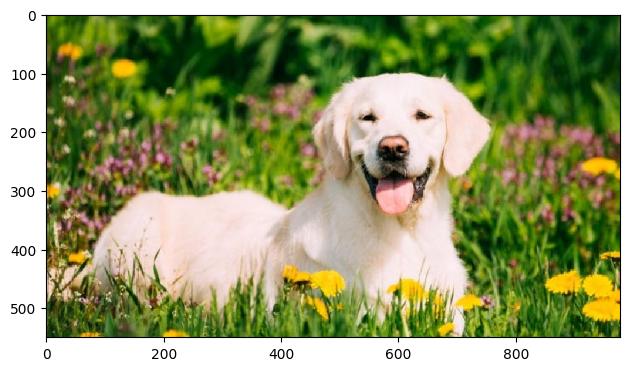

In [36]:
import skimage.io as io
image=io.imread('/content/drive/MyDrive/dog-allergies.jpg')
print(image.shape)
io.imshow(image)

Text(0.5, 1.0, 'Left to Right')

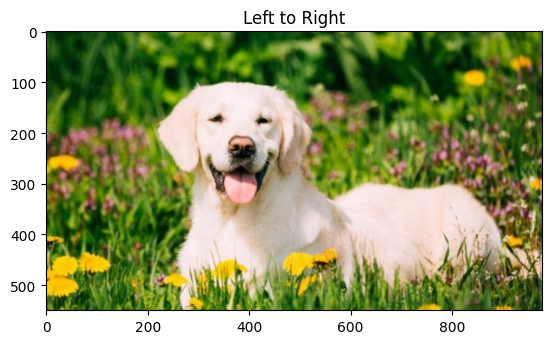

In [37]:
import numpy as np
flipLR=np.fliplr(image)
plt.imshow(flipLR)
plt.title('Left to Right')

Text(0.5, 1.0, 'Up Down Flipped')

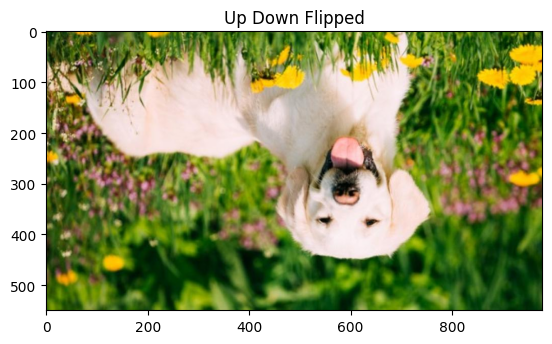

In [38]:
import numpy as np
flipUD=np.flipud(image)
plt.imshow(flipUD)
plt.title('Up Down Flipped')